In [1]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy as np
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas as pd
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
import bamboolib as bam
bam.disable()

scipy: 1.5.2
matplotlib: 3.3.2
sklearn: 0.20.3
statsmodels: 0.12.0
The bamboolib extension was disabled. You can enable it again via 'bam.enable()'. In case that bamboolib was not helpful to you, we are sorry and would like to fix this. Please write us a quick mail to info@8080labs.com so that we can serve you better in the future. Best regards, Tobias and Florian


262800


,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2017-01-01 00:00:00,63.90,2.4475,0.1492,4.860,136.111111,5.355556
2017-01-01 01:00:00,63.98,2.2461,0.1629,4.237,134.200000,4.666000
2017-01-01 02:00:00,64.18,2.2506,0.1539,5.073,129.700000,5.404000
2017-01-01 03:00:00,64.30,2.1027,0.1608,5.015,112.200000,5.287000
2017-01-01 04:00:00,64.18,2.0279,0.1686,6.725,82.800000,7.115000
...,...,...,...,...,...,...
2019-12-31 19:00:00,59.56,0.5822,0.2331,14.929,27.500000,17.630000
2019-12-31 20:00:00,59.27,0.7208,0.2327,14.346,27.900000,17.027000
2019-12-31 21:00:00,59.08,0.9824,0.2450,13.550,28.200000,16.327000


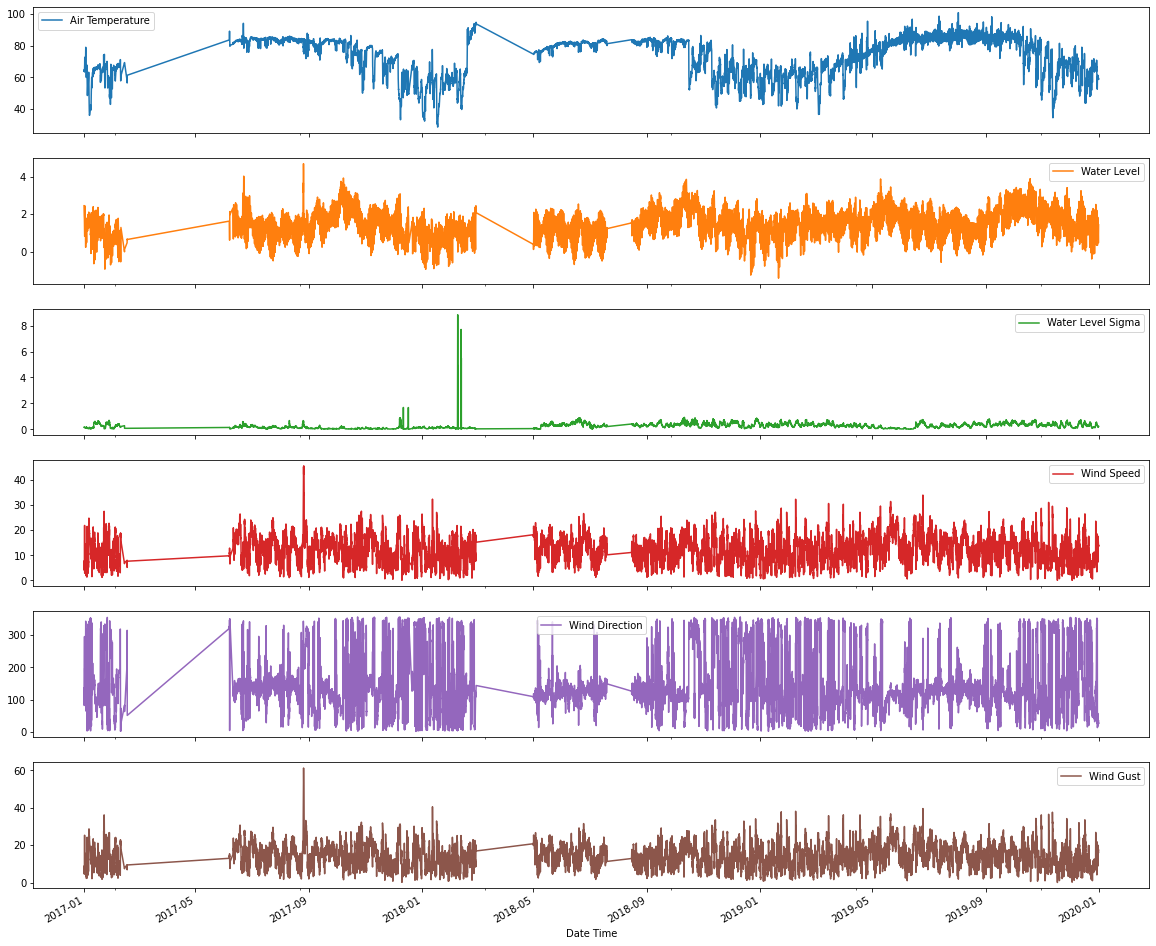

In [2]:
from pandas import read_csv
train = read_csv('BHPtraining.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
test = read_csv('BHPtest.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(len(train))
dfcol = ['Air Temperature', 'Water Level', 'Water Level Sigma','Wind Speed', 'Wind Direction', 'Wind Gust']
#train.dropna(inplace=True)
"""
for col in dfcol:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    train.loc[train[col] < Q1,col] = np.nan
    train.loc[train[col] < Q3,col] = np.nan
    
train['Month'] = pd.DatetimeIndex(train.index).month
train['Hour'] = pd.DatetimeIndex(train.index).hour
train['Day'] = pd.DatetimeIndex(train.index).day
train['Min'] = pd.DatetimeIndex(train.index).minute
"""

train = train.resample('H').mean()
train.dropna(inplace=True)

axes = train[dfcol].plot(figsize=(20, 18), subplots=True)
train

In [3]:
test.dropna(inplace=True)
""""
test['Month'] = pd.DatetimeIndex(test.index).month
test['Hour'] = pd.DatetimeIndex(test.index).hour
test['Day'] = pd.DatetimeIndex(test.index).day
test['Min'] = pd.DatetimeIndex(test.index).minute
for col in dfcol:
    Q1 = test[col].quantile(0.25)
    Q3 = test[col].quantile(0.75)
    IQR = Q3 - Q1
    test.loc[test[col] < Q1,col] = np.nan
    test.loc[test[col] < Q3,col] = np.nan
    """
test = test.resample('H').mean()
test.dropna(inplace=True)
test

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2020-01-01 00:00:00,59.180000,1.534800,0.207500,12.984000,30.900000,15.746000
2020-01-01 01:00:00,59.490000,1.636500,0.195800,12.265000,41.100000,14.385000
2020-01-01 02:00:00,59.960000,1.705300,0.182000,11.509000,43.600000,13.646000
2020-01-01 03:00:00,60.480000,1.627100,0.184000,10.865000,47.500000,12.830000
2020-01-01 04:00:00,60.920000,1.598100,0.181500,12.186000,51.000000,13.761000
...,...,...,...,...,...,...
2020-10-20 21:00:00,80.440000,1.858000,0.385200,12.091000,74.600000,13.783000
2020-10-20 22:00:00,79.770000,2.366700,0.380500,12.206000,78.600000,13.898000
2020-10-20 23:00:00,79.430000,2.721800,0.384300,12.497000,74.900000,14.228000


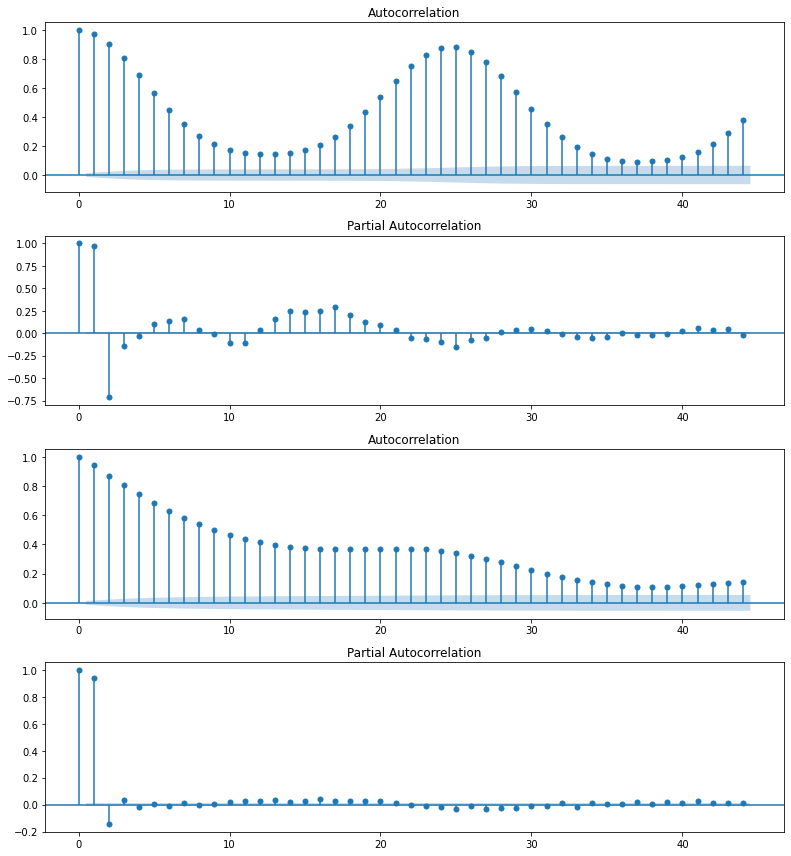

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(11,12))
pyplot.subplot(411)
plot_acf(train['Water Level'], ax=pyplot.gca())
pyplot.subplot(412)
plot_pacf(train['Water Level'], ax=pyplot.gca())
pyplot.subplot(413)
plot_acf(train['Wind Speed'], ax=pyplot.gca())
pyplot.subplot(414)
plot_pacf(train['Wind Speed'], ax=pyplot.gca())
pyplot.tight_layout()
pyplot.show()

In [5]:
spear = train.corr(method='spearman')

<AxesSubplot:>

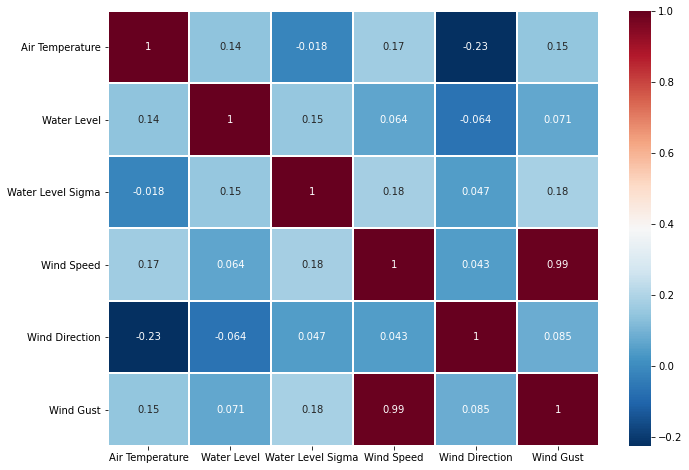

In [6]:
import seaborn as sns
a4_dims = (11, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
spear = train.corr(method='spearman')
sns.heatmap(spear,
            xticklabels = spear.columns,
            yticklabels = spear.columns,
            cmap = 'RdBu_r',
            annot=True,
            linewidth=1, ax=ax)

In [7]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat

def timeseries_to_supervised(data, lag=1):
    """Frame a sequence data into a supervised learning problem, i.e., time sequence -> (X, y)"""
    df = DataFrame(data)               # DataFrame is a pandas class
    columns = [df.shift(i) for i in range(1, lag+1)]   # shift() pushed dataframe or a column vector downwards by i spaces
    columns.insert(0, df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)   # turn NaN to 0
    return df

In [8]:
class renamer():
            def __init__(self):
                  self.d = dict()

            def __call__(self, x):
                if x not in self.d:
                    self.d[x] = 0
                    return x
                else:
                    self.d[x] += 1
                    return "%s_%d" % (x, self.d[x])


In [9]:
train = timeseries_to_supervised(train, 24)
test = timeseries_to_supervised(test, 24)



In [10]:


test.to_csv('test.csv')
train.to_csv('train.csv')
train = read_csv('train.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
test = read_csv('test.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
train

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust,Air Temperature.1,Water Level.1,Water Level Sigma.1,Wind Speed.1,...,Water Level Sigma.23,Wind Speed.23,Wind Direction.23,Wind Gust.23,Air Temperature.24,Water Level.24,Water Level Sigma.24,Wind Speed.24,Wind Direction.24,Wind Gust.24
Date Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,63.90,2.4475,0.1492,4.860,136.111111,5.355556,0.00,0.0000,0.0000,0.000,...,0.0000,0.000,0.0,0.000,0.00,0.0000,0.0000,0.000,0.0,0.000
2017-01-01 01:00:00,63.98,2.2461,0.1629,4.237,134.200000,4.666000,63.90,2.4475,0.1492,4.860,...,0.0000,0.000,0.0,0.000,0.00,0.0000,0.0000,0.000,0.0,0.000
2017-01-01 02:00:00,64.18,2.2506,0.1539,5.073,129.700000,5.404000,63.98,2.2461,0.1629,4.237,...,0.0000,0.000,0.0,0.000,0.00,0.0000,0.0000,0.000,0.0,0.000
2017-01-01 03:00:00,64.30,2.1027,0.1608,5.015,112.200000,5.287000,64.18,2.2506,0.1539,5.073,...,0.0000,0.000,0.0,0.000,0.00,0.0000,0.0000,0.000,0.0,0.000
2017-01-01 04:00:00,64.18,2.0279,0.1686,6.725,82.800000,7.115000,64.30,2.1027,0.1608,5.015,...,0.0000,0.000,0.0,0.000,0.00,0.0000,0.0000,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,59.56,0.5822,0.2331,14.929,27.500000,17.630000,59.70,0.4709,0.2271,14.813,...,0.2550,11.314,25.1,13.743,60.78,0.5875,0.2613,11.508,18.7,13.508
2019-12-31 20:00:00,59.27,0.7208,0.2327,14.346,27.900000,17.027000,59.56,0.5822,0.2331,14.929,...,0.2208,10.632,25.4,12.575,60.77,0.8793,0.2550,11.314,25.1,13.743
2019-12-31 21:00:00,59.08,0.9824,0.2450,13.550,28.200000,16.327000,59.27,0.7208,0.2327,14.346,...,0.2224,8.592,36.0,10.321,60.34,1.1017,0.2208,10.632,25.4,12.575


In [11]:
test['Month'] = pd.DatetimeIndex(test.index).month
test['Hour'] = pd.DatetimeIndex(test.index).hour
test['Day'] = pd.DatetimeIndex(test.index).day

train['Month'] = pd.DatetimeIndex(train.index).month
train['Hour'] = pd.DatetimeIndex(train.index).hour
train['Day'] = pd.DatetimeIndex(train.index).day


In [107]:
test

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust,Air Temperature.1,Water Level.1,Water Level Sigma.1,Wind Speed.1,...,Wind Gust.23,Air Temperature.24,Water Level.24,Water Level Sigma.24,Wind Speed.24,Wind Direction.24,Wind Gust.24,Month,Hour,Day
Date Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,59.180000,1.534800,0.207500,12.984000,30.900000,15.746000,0.00,0.0000,0.0000,0.000,...,0.000,0.00,0.0000,0.0000,0.000,0.0,0.000,1,0,1
2020-01-01 01:00:00,59.490000,1.636500,0.195800,12.265000,41.100000,14.385000,59.18,1.5348,0.2075,12.984,...,0.000,0.00,0.0000,0.0000,0.000,0.0,0.000,1,1,1
2020-01-01 02:00:00,59.960000,1.705300,0.182000,11.509000,43.600000,13.646000,59.49,1.6365,0.1958,12.265,...,0.000,0.00,0.0000,0.0000,0.000,0.0,0.000,1,2,1
2020-01-01 03:00:00,60.480000,1.627100,0.184000,10.865000,47.500000,12.830000,59.96,1.7053,0.1820,11.509,...,0.000,0.00,0.0000,0.0000,0.000,0.0,0.000,1,3,1
2020-01-01 04:00:00,60.920000,1.598100,0.181500,12.186000,51.000000,13.761000,60.48,1.6271,0.1840,10.865,...,0.000,0.00,0.0000,0.0000,0.000,0.0,0.000,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-20 21:00:00,80.440000,1.858000,0.385200,12.091000,74.600000,13.783000,80.87,1.4513,0.3819,8.804,...,16.193,82.36,2.4618,0.3830,13.433,103.8,15.493,10,21,20
2020-10-20 22:00:00,79.770000,2.366700,0.380500,12.206000,78.600000,13.898000,80.44,1.8580,0.3852,12.091,...,18.855,81.62,2.7676,0.3917,14.480,103.5,16.193,10,22,20
2020-10-20 23:00:00,79.430000,2.721800,0.384300,12.497000,74.900000,14.228000,79.77,2.3667,0.3805,12.206,...,19.360,80.96,2.9258,0.3915,16.212,103.8,18.855,10,23,20


In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

Y_train = train.filter(dfcol, axis=1)
X_train = train.drop(columns=dfcol)
X_train = sc_X.fit_transform(X_train)
Y_train = sc_y.fit_transform(Y_train)

Y_test = test.filter(dfcol, axis=1)
X_test = test.drop(columns=dfcol)
X_test = sc_X.fit_transform(X_test)
Y_test = sc_y.fit_transform(Y_test)

X_train

array([[-5.9722817 , -2.00545591, -1.15388493, ..., -1.72272121,
        -1.65725553, -1.67756952],
       [-0.73600991,  1.24327141, -0.50223406, ..., -1.72272121,
        -1.51265004, -1.67756952],
       [-0.72945433,  0.97593998, -0.44239749, ..., -1.72272121,
        -1.36804455, -1.67756952],
       ...,
       [-1.11541427, -1.04869078, -0.13753669, ...,  1.39629358,
         1.37945969,  1.73966866],
       [-1.13098378, -0.70145194, -0.0838148 , ...,  1.39629358,
         1.52406518,  1.73966866],
       [-1.1604839 , -0.36191182, -0.19999385, ...,  1.39629358,
         1.66867066,  1.73966866]])

In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor


param_grid = param = {'C' : [5],'degree' : [3],'coef0' : [0.01]},

mod = MultiOutputRegressor(SVR(kernel='rbf'))

model1 = mod.fit(X_train,Y_train)

In [14]:
y_pred = model1.predict(X_test)
y_new_inverse = sc_y.inverse_transform(y_pred)
y_inverse = sc_y.inverse_transform(Y_test)



In [15]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.4218125555213888

In [16]:
print(model1.score(X_test,Y_test))

0.8220741680045153


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

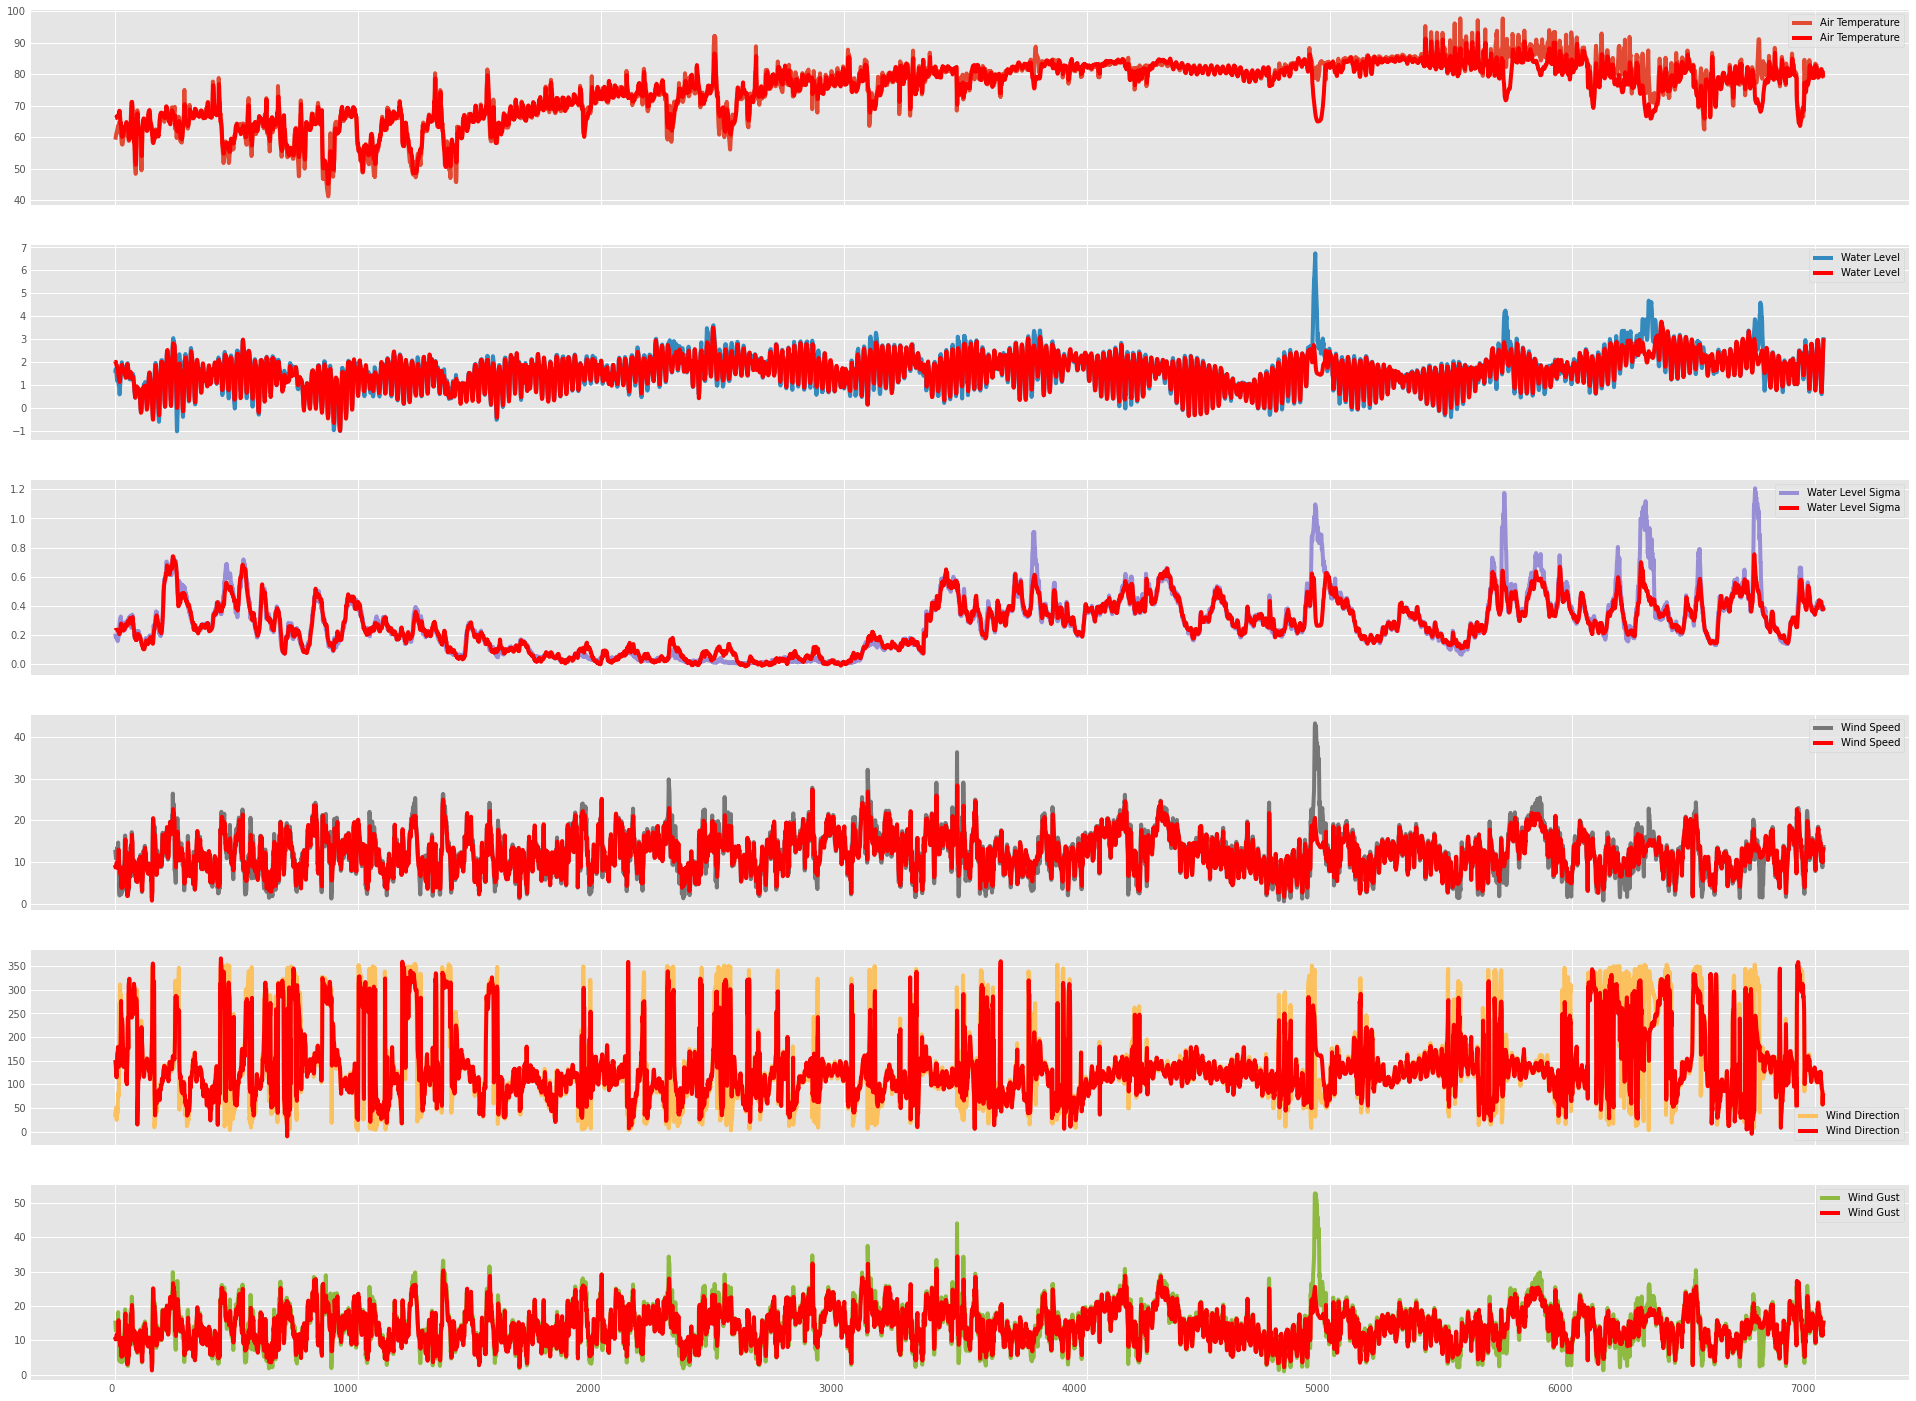

In [115]:
import matplotlib.pyplot as plt

y_df = pd.DataFrame(y_inverse)
y_n_df = pd.DataFrame(y_new_inverse)
y_df.columns = dfcol
y_n_df.columns = dfcol
axes = y_df[dfcol].plot(figsize=(30, 28), subplots=True)
y_n_df[dfcol].plot(figsize=(30, 28), subplots=True, ax = axes, color='red')



In [116]:
#not needed
test2 = train['2019-12-31 00:00:00':'2019-12-31 23:00:00']
test2 = test2.filter(dfcol, axis=1)
test2 = test2.to_numpy()
test2 = test2.reshape(144)
test2 = np.concatenate([test2,[1],[0],[1]])
df = pd.DataFrame(test2).T
df

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,59.42,1.7987,0.19,8.572,55.4,10.361,59.96,1.771,0.1938,8.533,...,16.619,58.84,1.4276,0.214,13.723,34.3,16.153,1.0,0.0,1.0


In [19]:
from scipy.ndimage.interpolation import shift
def next_pred(data, pred):
    data = shift(data, 6, cval=0.0)
    return data

,True Air Temperature,True Water Level,True Water Level Sigma,True Wind Speed,True Wind Direction,True Wind Gust
0,80.44,2.9603,0.3967,18.429,108.5,20.682
1,80.24,2.8968,0.4058,18.448,110.3,21.031
2,80.36,2.7882,0.4058,18.504,115.9,21.168
3,80.40,2.7158,0.4112,16.794,118.3,19.359
4,80.34,2.6044,0.4327,16.134,116.1,18.311
5,80.18,2.4410,0.4278,14.580,105.1,16.580
6,80.06,2.3476,0.4000,14.949,109.4,16.970
7,79.98,2.3182,0.3829,16.484,110.2,18.545
8,79.86,2.2107,0.4085,15.570,115.5,17.651
9,79.80,1.9841,0.4026,14.423,116.8,16.349


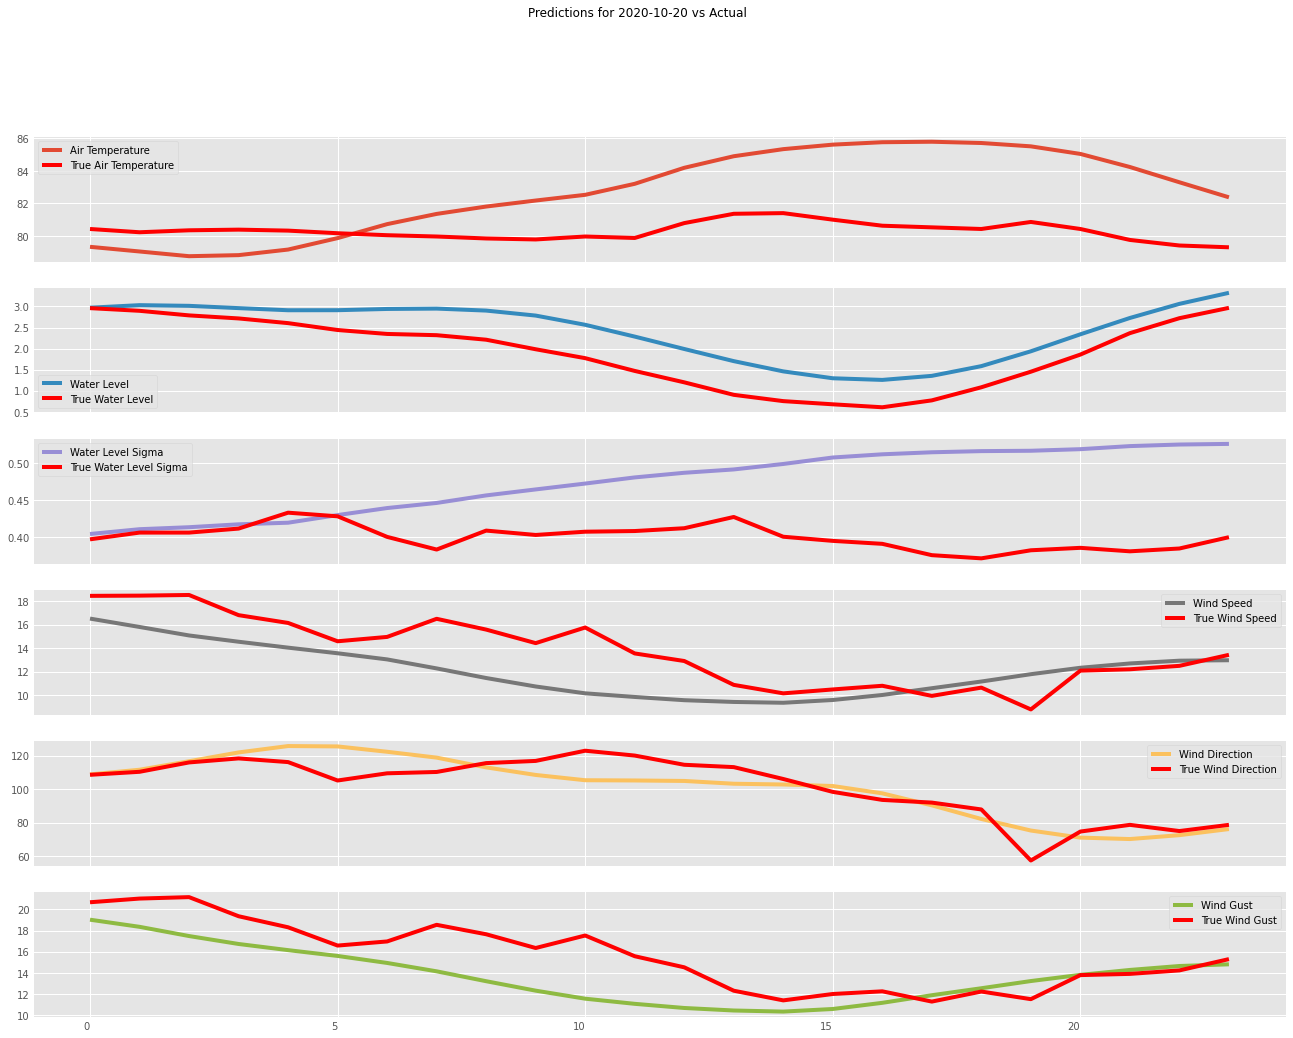

In [113]:
#next 24 hours by 23 hour all predicted data
df = pd.DataFrame()
pred_df = pd.DataFrame()
last_sample = X_test[7010]
for i in range(0,24):
    last_sample = last_sample.reshape(last_sample.shape[0],-1).T
    prediction = model1.predict(last_sample)
    last_sample = last_sample.flatten()
    last_sample = next_pred(last_sample,prediction)
    last_sample[:6]= prediction
    df2 = pd.DataFrame(last_sample).T
    df = df.append(df2, ignore_index=True)
    df3 = pd.DataFrame(prediction)
    pred_df = pred_df.append(df3, ignore_index=True)

matplotlib.style.use('ggplot')
pred_df.columns = dfcol
pred_df.reset_index()
pred_df = sc_y.inverse_transform(pred_df)
pred_df = pd.DataFrame(pred_df)
pred_df.columns = dfcol
axes = pred_df[dfcol].plot(figsize=(20, 18), subplots=True)
plot_df = pd.DataFrame(Y_test[7010:7034])
plot_df = sc_y.inverse_transform(plot_df)
plot_df = pd.DataFrame(plot_df)
dfcol2 = ['True ' + s for s in dfcol]
plot_df.columns = dfcol2
plot_df[dfcol2].plot(figsize=(30, 28), subplots=True, ax = axes, color='red', title="Predictions for 2020-10-20 vs Actual")
plot_df

In [102]:
pred_df

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
0,79.349161,2.970655,0.403899,16.502445,108.751606,19.030326
1,79.064107,3.031299,0.410390,15.792611,111.528439,18.355751
2,78.775889,3.015004,0.413072,15.073251,116.604345,17.482109
3,78.840953,2.960573,0.416989,14.541034,121.876504,16.730976
4,79.182163,2.910312,0.419149,14.040093,125.686460,16.148119
5,79.881765,2.911493,0.429481,13.563145,125.462672,15.597881
6,80.736765,2.940892,0.438958,13.042892,122.268487,14.933806
7,81.361604,2.949272,0.445861,12.279938,118.775435,14.140204
8,81.812610,2.902187,0.456039,11.466190,112.939971,13.204621
9,82.179927,2.783717,0.464112,10.748539,108.422323,12.310108


In [103]:
from sklearn.metrics import r2_score

for i in range(0,6):
    mse = mean_squared_error(plot_df.iloc[:,i], pred_df.iloc[:,i])
    rmse = np.sqrt(mse)
    print('RMSE of ' + str(dfcol[i]) + ':\t\t' + str(rmse))
    print('MSE of ' + str(dfcol[i]) + ':\t\t' + str(mse)+'\n')

for i in range(0,6):
    print('R^2 of' + str(dfcol[i]) + ':\t\t' + str(r2_score(plot_df.iloc[:,i], pred_df.iloc[:,i])))

for i in range(0,6):
    print('Average Error of ' + str(dfcol[i]) + ':\t\t' + str((plot_df.iloc[:,i] - pred_df.iloc[:,i]).mean()))
    print('Average Absolute Error of ' + str(dfcol[i]) + ':\t\t' + str(abs(plot_df.iloc[:,i] - pred_df.iloc[:,i]).mean()))
    print('Median Absolute Error of ' + str(dfcol[i]) + ':\t\t' + str(abs(plot_df.iloc[:,i] - pred_df.iloc[:,i]).median())+'\n')

RMSE of Air Temperature:		3.3309213805625544
MSE of Air Temperature:		11.095037243488752

RMSE of Water Level:		0.562863883656213
MSE of Water Level:		0.3168157515245549

RMSE of Water Level Sigma:		0.09130418401122523
MSE of Water Level Sigma:		0.008336454017955677

RMSE of Wind Speed:		2.540392156132047
MSE of Wind Speed:		6.453592306937232

RMSE of Wind Direction:		9.249899036837027
MSE of Wind Direction:		85.56063219167856

RMSE of Wind Gust:		2.72661240853389
MSE of Wind Gust:		7.43441522637098

R^2 ofAir Temperature:		-39.4203318652323
R^2 ofWater Level:		0.4994377145523756
R^2 ofWater Level Sigma:		-31.65107599992676
R^2 ofWind Speed:		0.20615677850415848
R^2 ofWind Direction:		0.7195463718754544
R^2 ofWind Gust:		0.24671312620742114
Average Error of Air Temperature:		-2.3747693347198804
Average Absolute Error of Air Temperature:		2.946932908255276
Median Absolute Error of Air Temperature:		3.1849331042727798

Average Error of Water Level:		-0.516166501972437
Average Absolute Er